In [1]:
import numpy as np 
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
%matplotlib inline


In [2]:
def dist(x1, x2):
    return np.sqrt(np.sum((x1-x2)**2)) #2-d euclidean distance
#fake data
np.random.seed(12345)
x1 = stats.multivariate_normal.rvs(mean=[1,1], cov=[[.15,0],[0,.15]], size=5)
x2 = stats.multivariate_normal.rvs(mean=[2,2], cov=[[.15,0],[0,.15]], size=6)
X = np.concatenate([x1, x2])
X[0]

array([0.92071706, 1.18549396])

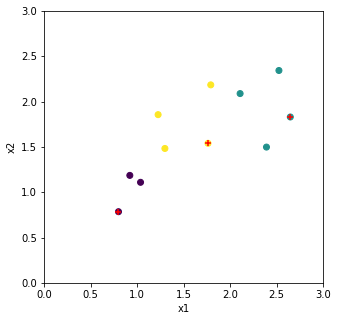

In [3]:
#Initialize
K = 3
#however...
x1_coords = [x[0] for x in X]
centroids = np.array([X[x1_coords.index(min(x1_coords))], \
                      X[x1_coords.index(max(x1_coords))], \
                     X[x1_coords.index(np.median(x1_coords))]])

dists = [0]*K
clusters = np.array([-1]*len(X))

###OPTIONAL visualization on initialization
for j in range(len(X)):
    dists = [dist(X[j], cent) for cent in centroids]
    assignment = dists.index(min(dists))
    clusters[j] = assignment
#initial cluster plot
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=clusters)
plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='red', marker='+')
plt.axis([0, 3, 0, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()
###END OPTIONAL

In [4]:
for _ in range(100): #100 steps is fine; or a tolerance/change check.
    #update classifications
    for j in range(len(X)):
        dists = [dist(X[j], cent) for cent in centroids]
        assignment = dists.index(min(dists))
        clusters[j] = assignment
    #update centroids
    for j in range(K):
        centroids[j]=[np.sum(X[clusters==j,0])/len(X[clusters==j,0]),np.sum(X[clusters==j,1])/len(X[clusters==j,1])]


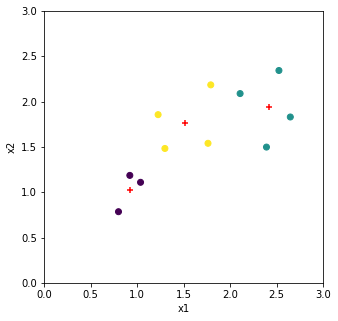

In [5]:
#final cluster plot
fig, ax = plt.subplots(1,1, figsize=(5,5))
plt.scatter([x[0] for x in X], [x[1] for x in X], c=clusters)
plt.scatter([x[0] for x in centroids], [x[1] for x in centroids], c='red', marker='+')

plt.axis([0, 3, 0, 3])
plt.xlabel("x1")
plt.ylabel("x2")
plt.show()